In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tensorflow.keras.applications import VGG16, InceptionResNetV2,VGG19
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax

In [6]:
train_df = pd.read_csv('/content/data/train.csv')
train_df.head()

,ImageID,label
0,0,black
1,1,white
2,2,black
3,3,black
4,4,black


In [7]:
train_df['ImageID'] = train_df['ImageID'].astype(str)+".jpg"
train_df

,ImageID,label
0,0.jpg,black
1,1.jpg,white
2,2.jpg,black
3,3.jpg,black
4,4.jpg,black
...,...,...
39995,39995.jpg,black
39996,39996.jpg,white
39997,39997.jpg,black
39998,39998.jpg,white


In [8]:
train_df['label'] = train_df['label'].astype('string')
train_df['ImageID'] = train_df['ImageID'].astype('string')

In [9]:
train_path = '/content/data/train'
validation_path = '/content/data/val'
test_path = '/content/data/test'

In [10]:
train_datagen = image.ImageDataGenerator(rescale=1./255,
                                         zoom_range = 0.1,
                                         horizontal_flip = True,
                                         validation_split = 0.2)
validation_datagen = image.ImageDataGenerator(rescale = 1./255,
                                        validation_split = 0.2)

In [11]:
train_generator = train_datagen.flow_from_dataframe(dataframe=train_df,
                                                    directory = train_path,x_col = 'ImageID',
                                                    y_col = 'label',
                                                    target_size = (224,224),
           color_mode = 'rgb',class_mode = 'categorical',batch_size = 32,subset = 'training')
val_generator = validation_datagen.flow_from_dataframe(dataframe = train_df,
                                                   directory = validation_path,
                                                   x_col = 'ImageID',
                                                   y_col = 'label',
                                                   target_size = (224,224),
                                                   color_mode = "rgb",
                                                   class_mode = "categorical",
                                                   batch_size = 32,
                                                   subset = 'validation')           

Found 32000 validated image filenames belonging to 2 classes.
Found 800 validated image filenames belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 36000 invalid image filename(s) in x_col="ImageID". These filename(s) will be ignored.
  .format(n_invalid, x_col)


In [12]:
"""model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding = 'Same', input_shape=(254, 254, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu',padding = 'Same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(256, (3,3), activation='relu',padding = 'Same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(256, (3,3), activation='relu',padding = 'Same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='softmax')
])"""

In [28]:
model = tf.keras.Sequential()
model.add(InceptionResNetV2(include_top = False,weights = 'imagenet',input_shape= (224,224,3)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(2,activation = 'softmax'))

219062272/219055592 [==============================] - 4s 0us/step


In [29]:
from tensorflow.keras.optimizers import RMSprop,Adam
optimizer = Adam(lr = 0.001)
model.compile(loss = 'categorical_crossentropy',
              optimizer = optimizer,
             metrics = ['accuracy'])

In [30]:
epochs = 10
batch_size = 32

In [31]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Functio (None, 5, 5, 1536)        54336736  
_________________________________________________________________
batch_normalization_209 (Bat (None, 5, 5, 1536)        6144      
_________________________________________________________________
flatten_2 (Flatten)          (None, 38400)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 76802     
Total params: 54,419,682
Trainable params: 54,356,066
Non-trainable params: 63,616
_________________________________________________________________


In [32]:
"""early_stop = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', min_delta = 0.001, 
                           patience = 5, mode = 'min', verbose = 1,
                           restore_best_weights = True)"""

"early_stop = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', min_delta = 0.001, \n                           patience = 5, mode = 'min', verbose = 1,\n                           restore_best_weights = True)"

In [33]:
history = model.fit_generator(train_generator,epochs = epochs,validation_data = val_generator)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
1000/1000 [==============================] - 613s 593ms/step - loss: 2.4595 - accuracy: 0.5691 - val_loss: 81.3952 - val_accuracy: 0.5412
Epoch 2/10
1000/1000 [==============================] - 596s 595ms/step - loss: 0.9203 - accuracy: 0.6557 - val_loss: 11.2831 - val_accuracy: 0.4863
Epoch 3/10
1000/1000 [==============================] - 592s 591ms/step - loss: 0.7520 - accuracy: 0.6879 - val_loss: 7979.6489 - val_accuracy: 0.5038
Epoch 4/10
1000/1000 [==============================] - 589s 589ms/step - loss: 1.1067 - accuracy: 0.6481 - val_loss: 1.0095 - val_accuracy: 0.4963
Epoch 5/10
1000/1000 [==============================] - 591s 591ms/step - loss: 0.7178 - accuracy: 0.6842 - val_loss: 2.2758 - val_accuracy: 0.5075
Epoch 6/10
1000/1000 [==============================] - 594s 594ms/step - loss: 0.5610 - accuracy: 0.7683 - val_loss: 1.9841 - val_accuracy: 0.4900
Epoch 7/10
1000/1000 [==============================] - 594s 594ms/step - loss: 0.5066 - accuracy: 0.8420 -

Text(0.5, 0, 'epoch')

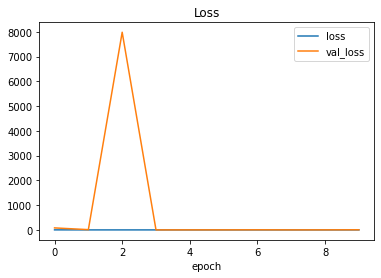

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

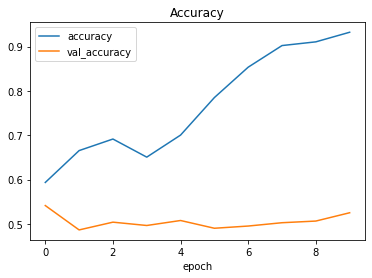

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [37]:
model.save('chess_challenge.h5')